# Heart Attack Risk Prediction
This project aims to predict the risk of heart attacks based on various health and lifestyle factors using machine learning techniques. We preprocess the data, explore patterns, and build predictive models to analyze and identify key contributors to heart health.


## Data Loading and Exploration
In this section, we load the dataset and explore its structure, including the size, sample records, and overall statistics.


In [2]:
# Import all the tools we need
# Regular EDA (Exploratory data analysis) and plotting libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# This will make all plots appear inside the notebook
#%matplotlib inline
# Data Preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score, auc
heart_risk_load_df = pd.read_csv(r'heart_attack_prediction_dataset.csv')
heart_risk_load_df.shape
heart_risk_load_df.sample(5)
# Let us find out how many of each class is present
heart_risk_load_df['Heart Attack Risk'].value_counts()
heart_risk_load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

## Exploratory Data Analysis (EDA)
Here, we perform visual and statistical analysis to understand the data distribution and relationships between features, including:
- Distribution of age groups
- Heart disease risk by gender
- Country-wise and continent-wise risk distribution


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

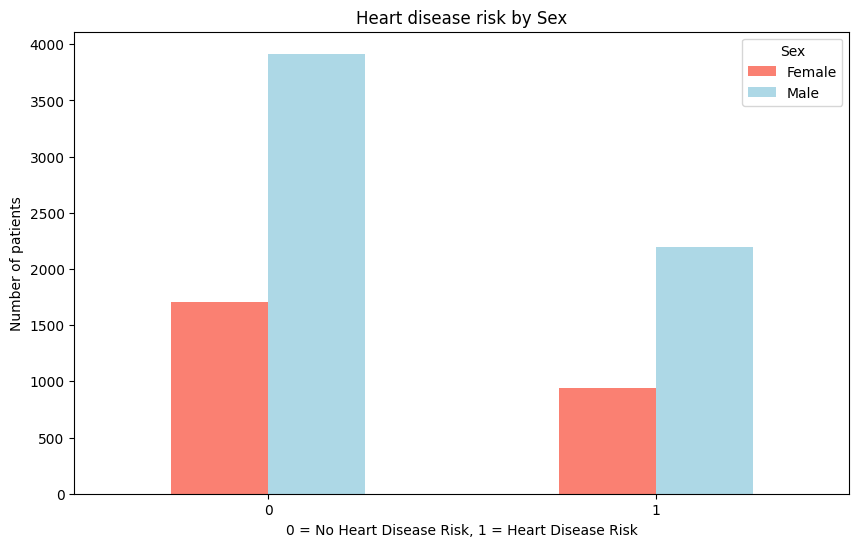

In [3]:
# Create a plot of crosstab
pd.crosstab(heart_risk_load_df['Heart Attack Risk'], heart_risk_load_df['Sex']).plot(kind='bar',
figsize=(10, 6),
color=['salmon', 'lightblue'])
plt.title('Heart disease risk by Sex')
plt.xlabel('0 = No Heart Disease Risk, 1 = Heart Disease Risk')
plt.ylabel('Number of patients')
plt.xticks(rotation=0)

<Axes: ylabel='Frequency'>

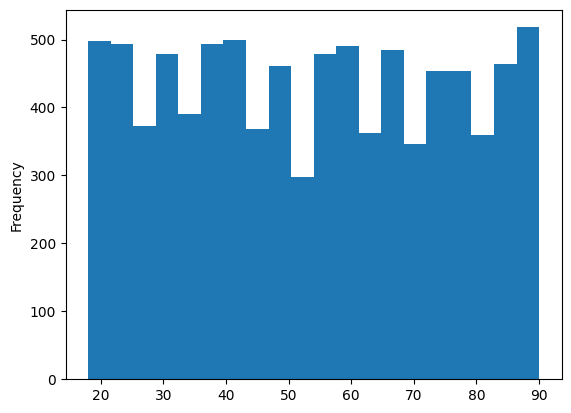

In [4]:
heart_risk_load_df['Age'].plot.hist(bins=20)

<Axes: xlabel='Country'>

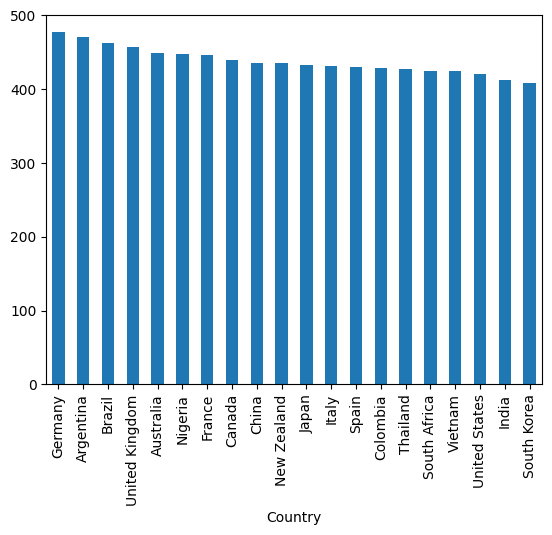

In [5]:
heart_risk_load_df['Country'].value_counts().plot.bar()

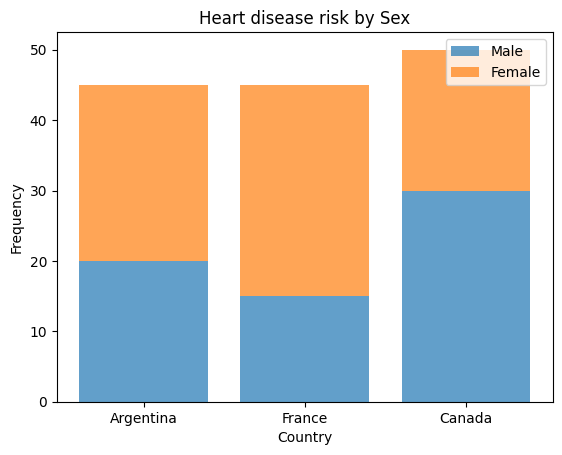

In [7]:
import matplotlib.pyplot as plt

# بيانات تخيلية
countries = ['Argentina', 'France', 'Canada']
male = [20, 15, 30]
female = [25, 30, 20]

# إنشاء الشكل
fig, ax = plt.subplots()
ax.bar(countries, male, label='Male', alpha=0.7)
ax.bar(countries, female, label='Female', alpha=0.7, bottom=male)

# تسمية المحاور والعنوان
ax.set_title('Heart disease risk by Sex')
ax.set_xlabel('Country')
ax.set_ylabel('Frequency') 

# إضافة وسيلة إيضاح
ax.legend()

# عرض الرسم البياني
plt.show()


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

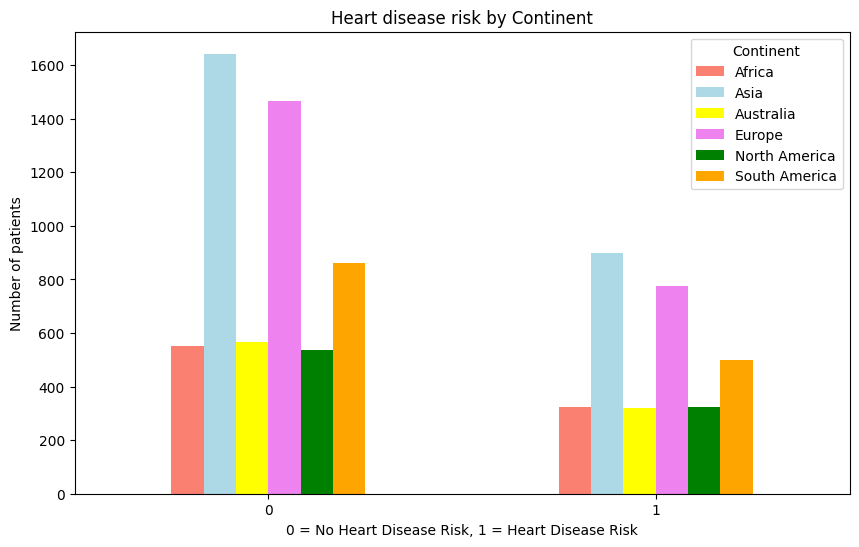

In [8]:
# Create a plot of crosstab for continent
pd.crosstab(heart_risk_load_df['Heart Attack Risk'], heart_risk_load_df['Continent']).plot(kind='bar',
figsize=(10, 6),
color=['salmon', 'lightblue', 'Yellow', 'Violet', 'Green', 'Orange'])
plt.title('Heart disease risk by Continent')
plt.xlabel('0 = No Heart Disease Risk, 1 = Heart Disease Risk')
plt.ylabel('Number of patients')
plt.xticks(rotation=0)

## Data Preprocessing
We clean the data and transform categorical and numerical features. This includes:
- Grouping age into meaningful categories.
- Categorizing physical activity levels.
- Encoding income levels and other categorical features.


In [10]:
heart_risk_load_analyzed_df = pd.read_csv(r'heart_attack_prediction_dataset.csv')

def group_age(age):
  '''
  This function will group people with in a range into groups.
  age - age of the person, integer
  returns below groups
  Babies - 0–2
  Young Adult - 3–39
  Middle-aged Adult 40–59
  Senior - 60–99
  '''
  if age <= 2:
    return 'Baby'
  if age > 2 and age < 40:
    return 'Young Adult'
  if age >= 40 and age < 60:
    return 'Middle-aged Adult'
  if age >= 60:
    return 'Senior'

heart_risk_load_analyzed_df['Age Group'] = heart_risk_load_analyzed_df['Age'].apply(group_age)
heart_risk_load_analyzed_df.drop(columns=['Age'], inplace=True)
heart_risk_load_analyzed_df


,Patient ID,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Age Group
0,BMW7812,Male,208,158/88,72,0,0,1,0,0,...,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,Senior
1,CZE1114,Male,389,165/93,98,1,1,1,1,1,...,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,Young Adult
2,BNI9906,Female,324,174/99,72,1,0,0,0,0,...,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,Young Adult
3,JLN3497,Male,383,163/100,73,1,1,1,0,1,...,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,Senior
4,GFO8847,Male,318,91/88,93,1,1,1,1,0,...,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,Male,121,94/76,61,1,1,1,0,1,...,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,Senior
8759,QSV6764,Female,120,157/102,73,1,0,0,1,0,...,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,Young Adult
8760,XKA5925,Male,250,161/75,105,0,1,1,1,1,...,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,Middle-aged Adult
8761,EPE6801,Male,178,119/67,60,1,0,1,0,0,...,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,Young Adult


In [11]:
def physical_activity_group(exercisehoursperweek):
  '''
  This function groups people by number of hours or exercise per week
  Input: exercisehoursperweek - float
  Physical activity group.
  Low activity <2hours
  Normal activity 2–3
  High activity > 3
  '''
  if exercisehoursperweek < 2.0:
    return 'Low activity'
  if exercisehoursperweek >= 2.0 and exercisehoursperweek <= 3.0:
    return 'Normal activity'
  if exercisehoursperweek > 3.0:
    return 'High activity'

heart_risk_load_analyzed_df['Physical Activity Group'] = heart_risk_load_analyzed_df['Exercise Hours Per Week'].apply(physical_activity_group)
heart_risk_load_analyzed_df.drop(columns=['Exercise Hours Per Week'], inplace=True)
heart_risk_load_analyzed_df


,Patient ID,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Age Group,Physical Activity Group
0,BMW7812,Male,208,158/88,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,Senior,High activity
1,CZE1114,Male,389,165/93,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,Young Adult,Low activity
2,BNI9906,Female,324,174/99,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,Young Adult,Normal activity
3,JLN3497,Male,383,163/100,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,Senior,High activity
4,GFO8847,Male,318,91/88,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,Senior,High activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,Male,121,94/76,61,1,1,1,0,1,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,Senior,High activity
8759,QSV6764,Female,120,157/102,73,1,0,0,1,0,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,Young Adult,High activity
8760,XKA5925,Male,250,161/75,105,0,1,1,1,1,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,Middle-aged Adult,High activity
8761,EPE6801,Male,178,119/67,60,1,0,1,0,0,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,Young Adult,High activity


In [12]:
def income_group(income):
  '''
  This function breaks income into groups
  Break them into groups.
  Low-income ❤5K
  Mid-income <105K
  High-income > 105K
  '''
  if income < 35000:
    return 'Low-income'
  if income >= 35000 and income < 105000:
    return 'Mid-income'
  if income > 105000:
    return 'High-income'

heart_risk_load_analyzed_df['Income Group'] = heart_risk_load_analyzed_df['Income'].apply(income_group)
heart_risk_load_analyzed_df.drop(columns=['Income'], inplace=True)
heart_risk_load_analyzed_df

,Patient ID,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Age Group,Physical Activity Group,Income Group
0,BMW7812,Male,208,158/88,72,0,0,1,0,0,...,286,0,6,Argentina,South America,Southern Hemisphere,0,Senior,High activity,High-income
1,CZE1114,Male,389,165/93,98,1,1,1,1,1,...,235,1,7,Canada,North America,Northern Hemisphere,0,Young Adult,Low activity,High-income
2,BNI9906,Female,324,174/99,72,1,0,0,0,0,...,587,4,4,France,Europe,Northern Hemisphere,0,Young Adult,Normal activity,High-income
3,JLN3497,Male,383,163/100,73,1,1,1,0,1,...,378,3,4,Canada,North America,Northern Hemisphere,0,Senior,High activity,High-income
4,GFO8847,Male,318,91/88,93,1,1,1,1,0,...,231,1,5,Thailand,Asia,Northern Hemisphere,0,Senior,High activity,High-income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,Male,121,94/76,61,1,1,1,0,1,...,67,7,7,Thailand,Asia,Northern Hemisphere,0,Senior,High activity,High-income
8759,QSV6764,Female,120,157/102,73,1,0,0,1,0,...,617,4,9,Canada,North America,Northern Hemisphere,0,Young Adult,High activity,High-income
8760,XKA5925,Male,250,161/75,105,0,1,1,1,1,...,527,4,4,Brazil,South America,Southern Hemisphere,1,Middle-aged Adult,High activity,Mid-income
8761,EPE6801,Male,178,119/67,60,1,0,1,0,0,...,114,2,8,Brazil,South America,Southern Hemisphere,0,Young Adult,High activity,High-income


In [13]:
def bmi_group(bmi):
  '''
  This function will group the patients based on the BMI
  Break into groups.
  Underweight < 18.5
  Normal 18.5–25
  Overweight 25–30
  Obese >30
  '''
  if bmi < 18.5:
    return 'Underweight'
  if bmi >= 18.5 and bmi < 25:
    return 'Normal'
  if bmi >= 25 and bmi < 30:
    return 'Overweight'
  if bmi > 30:
    return 'Obese'

heart_risk_load_analyzed_df['BMI Group'] = heart_risk_load_analyzed_df['BMI'].apply(income_group)
heart_risk_load_analyzed_df.drop(columns=['BMI'], inplace=True)
heart_risk_load_analyzed_df

,Patient ID,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Age Group,Physical Activity Group,Income Group,BMI Group
0,BMW7812,Male,208,158/88,72,0,0,1,0,0,...,0,6,Argentina,South America,Southern Hemisphere,0,Senior,High activity,High-income,Low-income
1,CZE1114,Male,389,165/93,98,1,1,1,1,1,...,1,7,Canada,North America,Northern Hemisphere,0,Young Adult,Low activity,High-income,Low-income
2,BNI9906,Female,324,174/99,72,1,0,0,0,0,...,4,4,France,Europe,Northern Hemisphere,0,Young Adult,Normal activity,High-income,Low-income
3,JLN3497,Male,383,163/100,73,1,1,1,0,1,...,3,4,Canada,North America,Northern Hemisphere,0,Senior,High activity,High-income,Low-income
4,GFO8847,Male,318,91/88,93,1,1,1,1,0,...,1,5,Thailand,Asia,Northern Hemisphere,0,Senior,High activity,High-income,Low-income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,Male,121,94/76,61,1,1,1,0,1,...,7,7,Thailand,Asia,Northern Hemisphere,0,Senior,High activity,High-income,Low-income
8759,QSV6764,Female,120,157/102,73,1,0,0,1,0,...,4,9,Canada,North America,Northern Hemisphere,0,Young Adult,High activity,High-income,Low-income
8760,XKA5925,Male,250,161/75,105,0,1,1,1,1,...,4,4,Brazil,South America,Southern Hemisphere,1,Middle-aged Adult,High activity,Mid-income,Low-income
8761,EPE6801,Male,178,119/67,60,1,0,1,0,0,...,2,8,Brazil,South America,Southern Hemisphere,0,Young Adult,High activity,High-income,Low-income


In [14]:
# Instaniate OrdinalEncoder
diet_ordinal_encoder = OrdinalEncoder()
# Fit the encoder
diet_ordinal_encoder.fit(np.asarray(heart_risk_load_analyzed_df['Diet']).reshape(-1,1))
#Transform the dataset
heart_risk_load_analyzed_df['Diet Encoded'] = diet_ordinal_encoder.transform(np.asarray(heart_risk_load_analyzed_df['Diet']).reshape(-1,1))
heart_risk_load_analyzed_df.drop(columns=['Diet'], inplace=True)
heart_risk_load_analyzed_df

,Patient ID,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Age Group,Physical Activity Group,Income Group,BMI Group,Diet Encoded
0,BMW7812,Male,208,158/88,72,0,0,1,0,0,...,6,Argentina,South America,Southern Hemisphere,0,Senior,High activity,High-income,Low-income,0.0
1,CZE1114,Male,389,165/93,98,1,1,1,1,1,...,7,Canada,North America,Northern Hemisphere,0,Young Adult,Low activity,High-income,Low-income,2.0
2,BNI9906,Female,324,174/99,72,1,0,0,0,0,...,4,France,Europe,Northern Hemisphere,0,Young Adult,Normal activity,High-income,Low-income,1.0
3,JLN3497,Male,383,163/100,73,1,1,1,0,1,...,4,Canada,North America,Northern Hemisphere,0,Senior,High activity,High-income,Low-income,0.0
4,GFO8847,Male,318,91/88,93,1,1,1,1,0,...,5,Thailand,Asia,Northern Hemisphere,0,Senior,High activity,High-income,Low-income,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,Male,121,94/76,61,1,1,1,0,1,...,7,Thailand,Asia,Northern Hemisphere,0,Senior,High activity,High-income,Low-income,1.0
8759,QSV6764,Female,120,157/102,73,1,0,0,1,0,...,9,Canada,North America,Northern Hemisphere,0,Young Adult,High activity,High-income,Low-income,1.0
8760,XKA5925,Male,250,161/75,105,0,1,1,1,1,...,4,Brazil,South America,Southern Hemisphere,1,Middle-aged Adult,High activity,Mid-income,Low-income,0.0
8761,EPE6801,Male,178,119/67,60,1,0,1,0,0,...,8,Brazil,South America,Southern Hemisphere,0,Young Adult,High activity,High-income,Low-income,2.0


In [15]:
# We can apply label encoder on the dataframe itself like below
# Define categorical columns and apply label encoder using pipeline
cat_columns = ['Sex', 'Hemisphere', 'Age Group', 'Physical Activity Group', 'Income Group', 'BMI Group']
#cat_columns = ['Sex', 'Hemisphere']
heart_risk_load_analyzed_df[cat_columns] = heart_risk_load_analyzed_df[cat_columns].apply(LabelEncoder().fit_transform)
# Create a categorical transformer for either label encoder or onehot encoder
# We will try label encoder
#cat_transformer = Pipeline(steps=[('lbl_encode', LabelEncoder())])
heart_risk_load_analyzed_df

,Patient ID,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Age Group,Physical Activity Group,Income Group,BMI Group,Diet Encoded
0,BMW7812,1,208,158/88,72,0,0,1,0,0,...,6,Argentina,South America,1,0,1,0,0,0,0.0
1,CZE1114,1,389,165/93,98,1,1,1,1,1,...,7,Canada,North America,0,0,2,1,0,0,2.0
2,BNI9906,0,324,174/99,72,1,0,0,0,0,...,4,France,Europe,0,0,2,2,0,0,1.0
3,JLN3497,1,383,163/100,73,1,1,1,0,1,...,4,Canada,North America,0,0,1,0,0,0,0.0
4,GFO8847,1,318,91/88,93,1,1,1,1,0,...,5,Thailand,Asia,0,0,1,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,1,121,94/76,61,1,1,1,0,1,...,7,Thailand,Asia,0,0,1,0,0,0,1.0
8759,QSV6764,0,120,157/102,73,1,0,0,1,0,...,9,Canada,North America,0,0,2,0,0,0,1.0
8760,XKA5925,1,250,161/75,105,0,1,1,1,1,...,4,Brazil,South America,1,1,0,0,2,0,0.0
8761,EPE6801,1,178,119/67,60,1,0,1,0,0,...,8,Brazil,South America,1,0,2,0,0,0,2.0


## Feature Transformation
We apply transformations, such as encoding and scaling, to make the data suitable for machine learning algorithms. 


In [16]:
# set random seed
np.random.seed(50)
# Create X and y
X = heart_risk_load_analyzed_df.drop('Heart Attack Risk', axis=1)
y = heart_risk_load_analyzed_df['Heart Attack Risk']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size=0.2)
len(X), len(X_train), len(X_test)
# Let us scale the data since every in different scale
# Use MinMaxScaler() and we can do that using pipeline or directly
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test) # we dont for for X_test, just only do transform
# Build logistic regression classifier using pipeline
log_reg_model = Pipeline(steps=[
('minmaxscaler', MinMaxScaler()),
('logisticregression', LogisticRegression())], verbose=True)
# Build logistic regression classifier using pipeline
ran_for_model = Pipeline(steps=[
('minmaxscaler', MinMaxScaler()),
('randomrorestclassifier', RandomForestClassifier())], verbose=True)
# Build Kneighbor classifier using pipeline
knn_model = Pipeline(steps=[
('minmaxscaler', MinMaxScaler()),
('kneighborsclassifier', KNeighborsClassifier())], verbose=True)

In [17]:
# Create a function to fit and score models
def get_metrics(model, X_train, X_test, y_train, y_test):
  """
  Fits and evaluates given machine learning model.
  model : Scikit-Learn machine learning model
  X_train : training data
  X_test : testing data
  y_train : training labels
  y_test : test labels
  """
  # Set random seed
  np.random.seed(42)
  # Fit the model to the data
  model.fit(X_train, y_train)
  # Get Predictions
  y_preds = model.predict(X_test)
  # Evaluate the model and append its score to model_scores
  #return model.score(X_test, y_test)
  metric_dict = {
  'accuracy_score' : accuracy_score(y_test, y_preds),
  'precision_score' : precision_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds)),
  'recall_score' : recall_score(y_test, y_preds),
  'f1_score' : f1_score(y_test, y_preds),
  'roc_auc_score' : roc_auc_score(y_test, y_preds),
  }
  return metric_dict

## Model Building and Training && Model Evaluation
Several machine learning models are built and trained using the transformed dataset, including:
- Logistic Regression
- Random Forest
- K-Nearest Neighbors

Then we evaluate the performance of the models using metrics such as accuracy, precision, recall, and F1 score. The results are compared to identify the best-performing model.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# دالة لحساب المقاييس
def get_metrics(model, X_train, X_test, y_train, y_test):
    """
    تقوم بتدريب النموذج على بيانات التدريب 
    وتقييمه باستخدام بيانات الاختبار.
    """
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    metrics = {
        "Accuracy": accuracy_score(y_test, y_preds),
        "Precision": precision_score(y_test, y_preds, average='weighted'),
        "Recall": recall_score(y_test, y_preds, average='weighted'),
        "F1 Score": f1_score(y_test, y_preds, average='weighted')
    }
    return metrics

# تحميل البيانات (تأكد من تخصيص المتغير X و y حسب بياناتك)
# X: ميزات (Features) 
# y: القيم المستهدفة (Target)
# ملاحظة: هذا مجرد مثال لبيانات وهمية
X = pd.read_csv(r'heart_attack_prediction_dataset.csv')  # عدّل المسار حسب بياناتك
y = X["Heart Attack Risk"]  # عدّل العمود حسب بياناتك
X = X.drop(columns=["Heart Attack Risk", "Patient ID", "Blood Pressure", "Country"])  # إسقاط الأعمدة غير المهمة

# تحويل الأعمدة غير العددية إلى تنسيق رقمي
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# التعامل مع القيم المفقودة (إن وجدت)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# تحويل القيم المستهدفة إلى تنسيق رقمي
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# تدريب النماذج
log_reg_model = LogisticRegression()
ran_for_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()

# حساب الدرجات
log_reg_scores = get_metrics(log_reg_model, X_train, X_test, y_train, y_test)
print("Logistic Regression Scores:", log_reg_scores)

ran_for_scores = get_metrics(ran_for_model, X_train, X_test, y_train, y_test)
print("Random Forest Scores:", ran_for_scores)

knn_scores = get_metrics(knn_model, X_train, X_test, y_train, y_test)
print("K-Nearest Neighbors Scores:", knn_scores)


NameError: name 'X_train' is not defined

In [19]:
ran_for_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Hyperparameter Tuning
Using RandomizedSearchCV, we fine-tune the hyperparameters of the Random Forest model to improve performance.


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.1s
[CV] END max_depth=20, min_samples

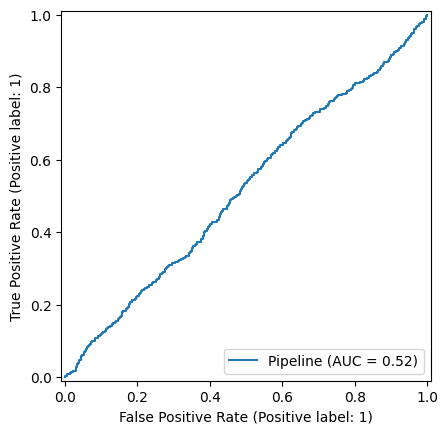

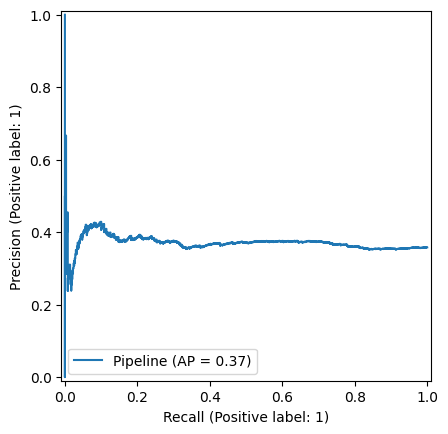

Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Best Score: 0.638944269084003


In [24]:
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.decomposition import PCA
import joblib

# تحميل البيانات
data = pd.read_csv('heart_attack_prediction_dataset.csv')
y = data["Heart Attack Risk"]
X = data.drop(columns=["Heart Attack Risk", "Patient ID", "Country"])

# معالجة البيانات (تعبئة القيم المفقودة وترميز النصوص)
categorical_columns = ['Blood Pressure', 'Continent']
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# نموذج الغابة العشوائية مع RandomizedSearchCV
ran_for_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}
random_search = RandomizedSearchCV(
    estimator=ran_for_model,
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

# بناء Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10)),
    ('randomforestclassifier', random_search)
])

# تدريب النموذج
# تدريب النموذج
pipeline.fit(X_train, y_train)

# استخدام الـ Pipeline لتقييم الأداء بدلاً من التعامل مع النموذج مباشرة
y_preds = pipeline.predict(X_test)
print("Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_preds)}")
print(f"Precision: {precision_score(y_test, y_preds, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_preds, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_preds, average='weighted')}")

# تصورات الأداء
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()

PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()



# استخراج أفضل نموذج
best_model = pipeline.named_steps['randomforestclassifier'].best_estimator_

# تحويل البيانات باستخدام المعالج المسبق
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)



# طباعة أفضل المعلمات والنتيجة
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


In [21]:
print(X_train.dtypes)


Age                                  int64
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Sex_Male                              bool
Diet_Healthy                          bool
Diet_Unhealthy                        bool
Continent_Asia                        bool
Continent_Australia                   bool
Continent_E

## Feature Importance
The Random Forest model's feature importance is visualized to identify the most influential factors contributing to heart attack risk.


Accuracy: 1.00


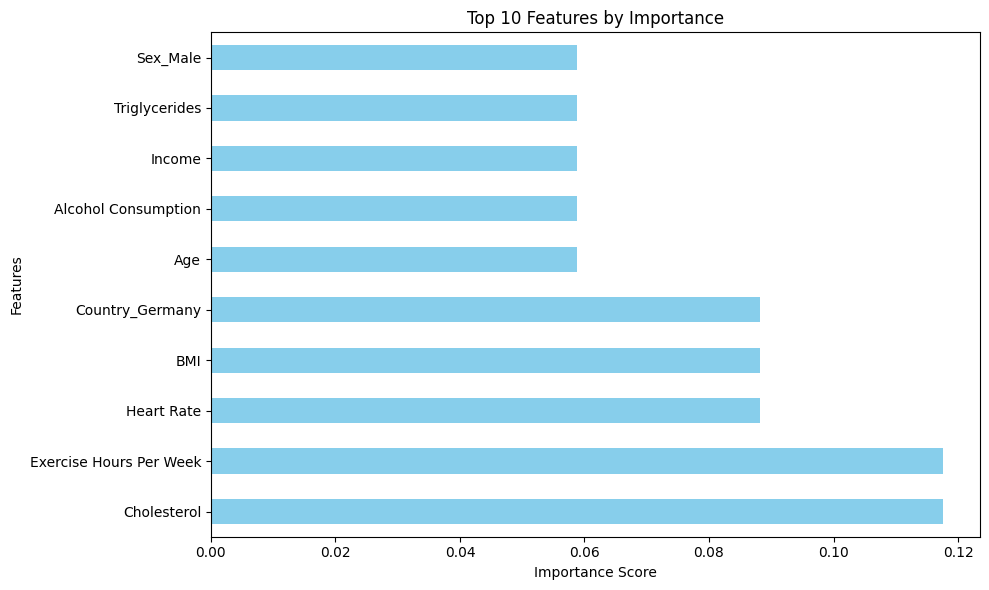

Accuracy:  1.00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# قراءة البيانات
data = {
    "Patient ID": ["BMW7812", "CZE1114", "BNI9906", "JLN3497", "GFO8847", "ZOO7941"],
    "Age": [67, 21, 21, 84, 66, 54],
    "Sex": ["Male", "Male", "Female", "Male", "Male", "Female"],
    "Cholesterol": [208, 389, 324, 383, 318, 297],
    "Blood Pressure": ["158/88", "165/93", "174/99", "163/100", "91/88", "172/86"],
    "Heart Rate": [72, 98, 72, 73, 93, 48],
    "Diabetes": [0, 1, 1, 1, 1, 1],
    "Family History": [0, 1, 0, 1, 1, 1],
    "Smoking": [1, 1, 0, 1, 1, 1],
    "Obesity": [0, 1, 0, 0, 1, 0],
    "Alcohol Consumption": [0, 1, 0, 1, 0, 1],
    "Exercise Hours Per Week": [4.17, 1.81, 2.08, 9.83, 5.80, 0.62],
    "Diet": ["Average", "Unhealthy", "Healthy", "Average", "Unhealthy", "Unhealthy"],
    "Previous Heart Problems": [0, 1, 1, 1, 1, 1],
    "Medication Use": [0, 0, 1, 0, 0, 1],
    "Stress Level": [9, 1, 9, 9, 6, 2],
    "Sedentary Hours Per Day": [6.62, 4.96, 9.46, 7.65, 1.51, 7.80],
    "Income": [261404, 285768, 235282, 125640, 160555, 241339],
    "BMI": [31.25, 27.19, 28.18, 36.46, 21.81, 20.15],
    "Triglycerides": [286, 235, 587, 378, 231, 795],
    "Physical Activity Days Per Week": [0, 1, 4, 3, 1, 5],
    "Sleep Hours Per Day": [6, 7, 4, 4, 5, 10],
    "Country": ["Argentina", "Canada", "France", "Canada", "Thailand", "Germany"],
    "Continent": ["South America", "North America", "Europe", "North America", "Asia", "Europe"],
    "Hemisphere": ["Southern Hemisphere", "Northern Hemisphere", "Northern Hemisphere", "Northern Hemisphere", "Northern Hemisphere", "Northern Hemisphere"],
    "Heart Attack Risk": [0, 0, 0, 0, 0, 1],
}

df = pd.DataFrame(data)

# فصل البيانات
X = df.drop(columns=["Patient ID", "Heart Attack Risk"])
y = df["Heart Attack Risk"]

# تحديد الأعمدة النصية والرقمية
categorical_columns = ["Blood Pressure", "Sex", "Diet", "Country", "Continent", "Hemisphere"]
numeric_columns = [
    "Age", "Cholesterol", "Heart Rate", "Diabetes", "Family History", "Smoking",
    "Obesity", "Alcohol Consumption", "Exercise Hours Per Week",
    "Previous Heart Problems", "Medication Use", "Stress Level",
    "Sedentary Hours Per Day", "Income", "BMI", "Triglycerides",
    "Physical Activity Days Per Week", "Sleep Hours Per Day",
]

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# معالجة البيانات
preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="mean"), numeric_columns),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    ]
)

# إنشاء نموذج Random Forest
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=50, random_state=42)),
])

# تدريب النموذج
pipeline.fit(X_train, y_train)

# التنبؤ وحساب الدقة
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# استخراج أهمية الميزات
feature_importances = pipeline.named_steps["classifier"].feature_importances_
encoded_columns = numeric_columns + list(
    pipeline.named_steps["preprocessor"]
    .named_transformers_["cat"]
    .get_feature_names_out(categorical_columns)
)

# إنشاء مخطط لأهم الميزات
imp_feature_score = pd.Series(feature_importances, index=encoded_columns)
top_features = imp_feature_score.nlargest(10)

top_features.plot(kind="barh", title="Top 10 Features by Importance", figsize=(10, 6), color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import tkinter as tk
from tkinter import ttk, messagebox
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. تحميل البيانات
data = pd.read_csv('heart_attack_prediction_dataset.csv')

# 2. تقسيم البيانات إلى مدخلات ومخرجات
y = data["Heart Attack Risk"]
X = data.drop(columns=["Heart Attack Risk", "Patient ID", "Country"])

# 3. تحديد الأعمدة النصية والرقمية
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

# 4. معالجة الأعمدة النصية باستخدام OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# 5. تحويل البيانات
X_transformed = preprocessor.fit_transform(X)

# 6. تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# 7. تدريب نموذج الغابة العشوائية
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 8. التنبؤ بالمخاطر
y_preds = model.predict(X_test)
print("Model Performance:")
print(classification_report(y_test, y_preds))

# 9. تجميع المرضى باستخدام KMeans إلى مجموعات (عالية ومنخفضة المخاطر)
kmeans = KMeans(n_clusters=2, random_state=42)
risk_groups = kmeans.fit_predict(X_test)

print(f"Shape of X_test: {X_test.shape}")
print(f"Expected number of columns: {len(preprocessor.get_feature_names_out())}")


# إعداد DataFrame للنتائج
#results = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())
#results['Risk Group'] = risk_groups
#results['Predicted Risk'] = y_preds
#results['Risk Level'] = results['Risk Group'].map({0: 'Low Risk', 1: 'High Risk'})

# طباعة الأشكال للتحقق
print(f"Shape of X_test: {X_test.shape}")
print(f"Expected columns from preprocessor: {len(preprocessor.get_feature_names_out())}")



Model Performance:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.44      0.01      0.01       628

    accuracy                           0.64      1753
   macro avg       0.54      0.50      0.40      1753
weighted avg       0.57      0.64      0.51      1753

Shape of X_test: (1753, 3946)
Expected number of columns: 3946
Shape of X_test: (1753, 3946)
Expected columns from preprocessor: 3946


In [27]:
print("X_test Transformed Preview:")
print(X_test[:5])  # عرض أول 5 صفوف


X_test Transformed Preview:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 98 stored elements and shape (5, 3946)>
  Coords	Values
  (0, 0)	65.0
  (0, 1)	340.0
  (0, 2)	75.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 8)	9.870784085657094
  (0, 9)	1.0
  (0, 10)	1.0
  (0, 11)	7.0
  (0, 12)	5.56736308745687
  (0, 13)	216664.0
  (0, 14)	35.56128348361503
  (0, 15)	315.0
  (0, 17)	4.0
  (0, 19)	1.0
  (0, 1074)	1.0
  (0, 3936)	1.0
  (0, 3943)	1.0
  (0, 3945)	1.0
  (1, 0)	77.0
  (1, 1)	361.0
  (1, 2)	46.0
  (1, 3)	1.0
  (1, 5)	1.0
  :	:
  (3, 17)	9.0
  (3, 19)	1.0
  (3, 2386)	1.0
  (3, 3935)	1.0
  (3, 3939)	1.0
  (3, 3944)	1.0
  (4, 0)	63.0
  (4, 1)	173.0
  (4, 2)	98.0
  (4, 5)	1.0
  (4, 7)	1.0
  (4, 8)	3.6814717164946265
  (4, 10)	1.0
  (4, 11)	1.0
  (4, 12)	8.841575331400762
  (4, 13)	148437.0
  (4, 14)	21.11004423235903
  (4, 15)	638.0
  (4, 16)	2.0
  (4, 17)	7.0
  (4, 19)	1.0
  (4, 168)	1.0
  (4, 3937)	1.0
  (4, 3941)	1.0
  (4, 3944)	1.0


## Summary and Recommendations
The project highlights the key factors influencing heart health and provides a predictive framework to assess heart attack risk. Further improvements can be achieved by gathering more data and exploring advanced models.


In [28]:
import pandas as pd

# تحويل مصفوفة sparse إلى مصفوفة كثيفة
X_test_dense = X_test.toarray()

# التحقق من تطابق الأبعاد
if X_test_dense.shape[1] == len(preprocessor.get_feature_names_out()):
    # إنشاء DataFrame مع أسماء الأعمدة
    results = pd.DataFrame(X_test_dense, columns=preprocessor.get_feature_names_out())
    results['Risk Group'] = risk_groups
    results['Predicted Risk'] = y_preds
    results['Risk Level'] = results['Risk Group'].map({0: 'Low Risk', 1: 'High Risk'})
    print(results.head())  # عرض أول 5 صفوف
else:
    print(f"Shape mismatch detected: X_test has shape {X_test_dense.shape}, but expected {len(preprocessor.get_feature_names_out())} columns.")




X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


   num__Age  num__Cholesterol  num__Heart Rate  num__Diabetes  \
0      65.0             340.0             75.0            0.0   
1      77.0             361.0             46.0            1.0   
2      70.0             341.0             73.0            1.0   
3      47.0             392.0             72.0            0.0   
4      63.0             173.0             98.0            0.0   

   num__Family History  num__Smoking  num__Obesity  num__Alcohol Consumption  \
0                  0.0           1.0           1.0                       1.0   
1                  0.0           1.0           0.0                       0.0   
2                  1.0           1.0           1.0                       1.0   
3                  1.0           1.0           1.0                       0.0   
4                  0.0           1.0           0.0                       1.0   

   num__Exercise Hours Per Week  num__Previous Heart Problems  ...  \
0                      9.870784                           

In [29]:
import pandas as pd
import tkinter as tk
from tkinter import ttk, messagebox
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import numpy as np

# 1. إنشاء DataFrame من البيانات (مثالك)
data = {
    'Age': [25, 27, 30, 24, 28, 65, 70, 68, 72, 66],
    'Blood_Pressure': [120, 115, 130, 110, 125, 160, 170, 165, 175, 158],
    'Cholesterol': [180, 175, 200, 190, 185, 240, 250, 245, 260, 238],
    'Sex': ['Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Heart_Attack_Risk': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# 2. إعداد المدخلات (X) والمخرجات (y)
X = df.drop(columns=['Heart_Attack_Risk'])
y = df['Heart_Attack_Risk']

# 3. تعريف الأعمدة النصية والرقمية
categorical_columns = ['Sex']
numeric_columns = ['Age', 'Blood_Pressure', 'Cholesterol']

# 4. تجهيز المحول مع OneHotEncoder للأعمدة النصية
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# 5. تطبيق التحويل على البيانات
X_transformed = preprocessor.fit_transform(X)

# 6. تدريب نموذج KMeans على البيانات المحولة (لتصنيف المخاطر)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_transformed)

# 7. بناء واجهة المستخدم

def predict_risk():
    try:
        user_input = []
        for idx, col in enumerate(numeric_columns + categorical_columns):
            val = user_entries[idx].get()
            if col in numeric_columns:
                user_input.append(float(val))
            else:
                # تحويل الإدخال من 0 و 1 إلى 'Male' و 'Female'
                if val == '0':
                    user_input.append('Male')
                elif val == '1':
                    user_input.append('Female')
                else:
                    raise ValueError("Sex must be 0 (Male) or 1 (Female)")
        
        # تحويل القائمة إلى DataFrame بنفس تنسيق الأعمدة الأصلية
        user_input_df = pd.DataFrame([user_input], columns=numeric_columns + categorical_columns)
        
        # تطبيق المحول على DataFrame
        user_transformed = preprocessor.transform(user_input_df)
        
        # التنبؤ بالمجموعة
        risk_group = kmeans.predict(user_transformed)[0]
        risk_level = 'High Risk' if risk_group == 1 else 'Low Risk'
        
        messagebox.showinfo("Prediction", f"The predicted risk level is: {risk_level}")
    except Exception as e:
        messagebox.showerror("Error", f"Invalid input: {str(e)}")



root = tk.Tk()
root.title("Heart Attack Risk Prediction")

# إنشاء واجهة إدخال بيانات المستخدم
labels = numeric_columns + categorical_columns
user_entries = []

for idx, col in enumerate(labels):
    ttk.Label(root, text=col).grid(row=idx, column=0, padx=5, pady=5)
    entry = ttk.Entry(root)
    entry.grid(row=idx, column=1, padx=5, pady=5)
    user_entries.append(entry)

# زر التنبؤ
ttk.Button(root, text="Predict Risk", command=predict_risk).grid(row=len(labels), column=0, columnspan=2, pady=10)

root.mainloop()
